# Plot signals measured by the instruments

Generic libraries:

In [1]:
from functools import partial
from pathlib import Path
import tomllib

Other libraries required for this notebook:

In [2]:
from multipac_testbench.multipactor_test import MultipactorTest
import multipac_testbench.instruments as ins
from multipac_testbench.util.post_treaters import running_mean

Define the project path, load the configuration.

In [3]:
project = Path("../data/test")
config_path = Path(project, "testbench_configuration.toml")

with open(config_path, "rb") as f:
    config = tomllib.load(f)

In [4]:
results_path = Path(project, "120MHz-SWR4.csv")
multipactor_test = MultipactorTest(results_path,
                                   config,
                                   freq_mhz=120.,
                                   swr=4.,
                                   sep=',')

To plot you just need to do:

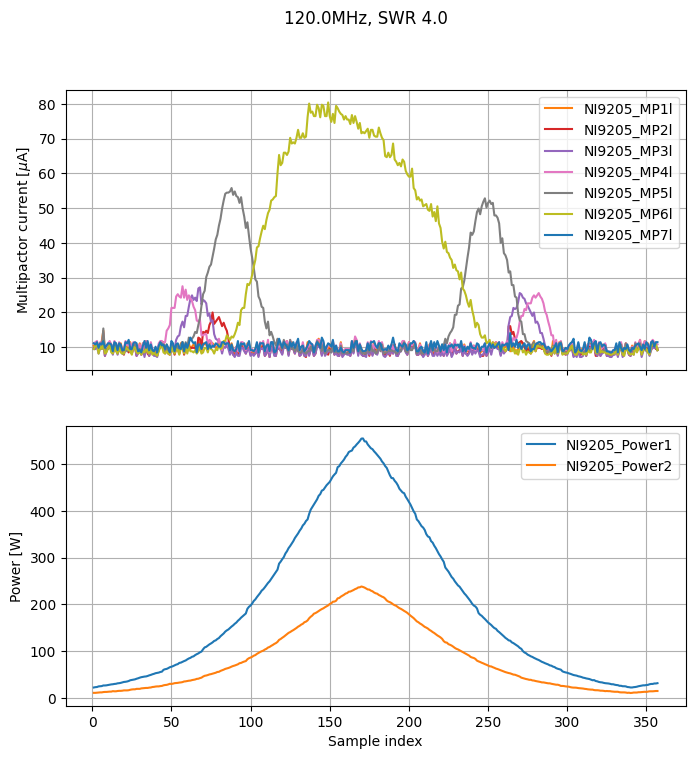

In [5]:
to_plot = (ins.CurrentProbe, ins.Power)
exclude = 'NI9205_E1',
figsize = (8, 8)
_, _ = multipactor_test.sweet_plot(*to_plot, exclude=exclude, figsize=figsize)

A common operation is to smoothen the current. You can do so with:

In [6]:
current_smoother = partial(
    running_mean,
    n_mean=10,
    mode='same',
)

multipactor_test.add_post_treater(
    current_smoother,
    ins.CurrentProbe,
)

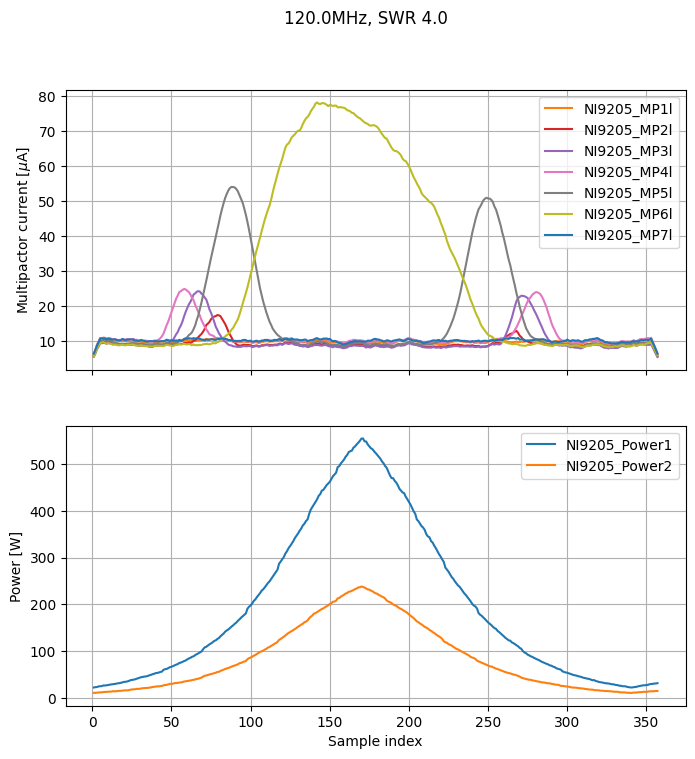

In [7]:
_, _ = multipactor_test.sweet_plot(*to_plot, exclude=exclude, figsize=figsize)